<a href="https://colab.research.google.com/github/amkim3/cs461/blob/main/CS461_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import fftpack
import pandas as pd
import seaborn as sns
from scipy.integrate import simps

samplingFrequency = 512
practiceEEGFile = "https://raw.githubusercontent.com/htil/Simple-Ganglion-BLE-App/master/data/practice_eeg_512Hz.csv"

def get_window(signal, start, end):
  return signal[start:end]

def formatEpoch(fileURL, channel, seconds=133):
  chan = [channel]
  raw_signal = pd.read_csv(fileURL, sep=',', usecols = chan)
  epoch = get_window(raw_signal, 0, samplingFrequency * seconds)
  epoch = epoch.to_numpy()
  epoch = epoch.flatten()
  return epoch

# Generating Raw EEG Plots (Time Domain)
def plotRawEEG(fileURL, channel):
  seconds = 133
  epoch = formatEpoch(fileURL, channel, seconds)
  t = np.linspace(0, seconds, len(epoch), endpoint=False)
  plt.plot(t,epoch)
  plt.xlabel('Time [s]')
  plt.ylabel('Signal amplitude');


# Plot Power-Spectrum Density (Frequency Domain)
def plotPSD(fileURL, channel, psdWindowSize=4):
  chan = [channel]
  win = psdWindowSize * samplingFrequency

  epoch = formatEpoch(fileURL, channel)
  freqs, psd = signal.welch(epoch, samplingFrequency, nperseg=win)
  sns.set(font_scale=1.2, style='white')
  plt.ylim([0, psd.max() * 1.1])
  plt.xlim([0, 40])
  plt.plot(freqs,psd,color='k',lw=2)
  plt.xlabel('Frequency (Hz)')
  plt.ylabel("Power spectral density (V^2 / Hz)")
  plt.title("Welch's periodogram")
  sns.despine()


# Calculating Absolute Band Power
def getbandPower(fileURL, channel, low, high, psdWindowSize=4):
  epoch = formatEpoch(fileURL, channel)
  win = psdWindowSize * samplingFrequency
  freqs,psd = signal.welch(epoch, samplingFrequency, nperseg=win)
  idx_delta = np.logical_and(freqs>=low, freqs<=high)
  freq_res = freqs[1] - freqs[0]
  delta_power = simps(psd[idx_delta], dx=freq_res)
  return delta_power

def getRelativeBandPower(fileURL, channel, low, high):
  epoch = formatEpoch(fileURL, channel)
  win = 1/2 * samplingFrequency
  freqs,psd = signal.welch(epoch, samplingFrequency, nperseg=win)
  freq_res = freqs[1] - freqs[0]
  return getbandPower(fileURL, channel, low, high)/simps(psd,dx=freq_res)


# Calculating Relative Band Power
def getDeltaBetaRelativeBandPower(fileURL, channel):
  low, high = .5, 4
  deltaRelativeBandPower = getRelativeBandPower(fileURL, channel, 0.5, 4)
  betaRelativeBandPower = getRelativeBandPower(fileURL, channel, 14, 30)
  return deltaRelativeBandPower/betaRelativeBandPower


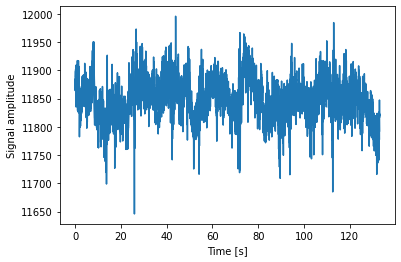

In [7]:
plotRawEEG(practiceEEGFile, 6)

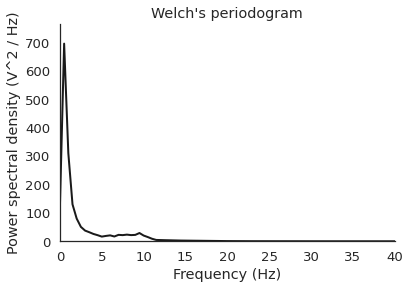

In [8]:
plotPSD(practiceEEGFile,1,2)

In [9]:
p = getbandPower(practiceEEGFile, 2, 0.5, 4)
print(p)
p = getbandPower(practiceEEGFile, 2, 14, 30)
print(p)

505.6148878832555
15.10356824211873


In [10]:
p = getDeltaBetaRelativeBandPower(practiceEEGFile,2)
print(p)

33.47651891115816
